In [ ]:
#Issues Related to data collections

In [1]:
# making use of Synthetically generated pidgin Scam messages

In [ ]:
# Issues with preprocessing like stemming or lemmatixzation

In [ ]:
Preprocessing - involves operation such as stemming.
Tokenization - process of piding a corpus into small entities (word)
Feature Engineering 

## Import of Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Cooking up the dataset

In [ ]:
## Range of scam messages
-  # Inheritance Scams (1-5)
- # Lottery Scams 
- # Banl Transfer Scams
- #Advanced Fee scams
- # Job offer Scams
-  #Religious/Charity Scams (26-30)

In [53]:
data_scam = {
    "text":[
        # Inheritance Scams (1-5)
        "Abeg my brother, I be Barrister John from Naija. Your late uncle don leave you $8.5M. Pay small fee of $500 to collect ya money. Urgent!",
        "Maga, I dey court now. Your papa cousin die for UK, him leave you £2M. Send your BVN quick quick!",
        "Dear friend, na me be Pastor Mike. God reveal say you go inherit $3M from dead brother. Reply ASAP for prayers!",
        "Oga, you don win family inheritance! Na $5M dey for your name. Abeg send account number to transfer.",
        "URGENT! Your mama brother for America don die. Him leave you house worth $1.2M. Pay lawyer fee of $200 to claim.",

        # Lottery Scams (6-10)
        "CONGRATULATIONS! You don win ₦50M for MTN lottery. Click [fraudlink.com] to claim before 24hrs!",
        "Abeg una, GTBank don select you win $10M. Send ATM card details to collect ya money!",
        "Maga must pay! You win Dubai visa lottery. Pay ₦5,000 processing fee to collect ya prize.",
        "Dear customer, your phone number don win 2024 Coca-Cola promo. Wire $100 to get ya $1M prize.",
        "Omo Naija, you don win UK green card lottery. Pay ₦10,000 for delivery. No dull yourself!",

        # Bank Transfer Scams (11-15)
        "Abeg help me transfer $12M from CBN. You go get 30% if you send your account number now now!",
        "URGENT! I be Mrs. Joy from UBA. We need your account to wire $7M. Reply with BVN!",
        "Maga, I be Oyinbo man. I wan transfer $5M to you. Send your account and ATM PIN!",
        "Dear sister, na me be Prince Ade from Saudi. I go transfer $9M to you. Abeg keep 20% for yourself!",
        "Oga, my boss don die for plane crash. Help me transfer him $15M, you go take 40%. No time!",

        # Advanced Fee (419) Scams (16-20)
        "Abeg I be widow for Libya. I need your account to transfer my late husband $6M. You go get 25%!",
        "Maga, I be army officer. We find $20M for Boko Haram camp. Pay $300 to help us move am!",
        "Dear friend, na God send you. My pikin dey sick for hospital. Wire $500 to save am, I go pay you $10K next week!",
        "URGENT! I be NNPC staff. We dey sell crude oil cheap. Pay $1,000 to join and make millions!",
        "Omo Yoruba, I get secret to hack GTBank. Pay ₦2,000 to learn how to make ₦5M daily!",

        # Job Offer Scams (21-25)
        "Abeg you don get job as PayPal agent. Pay ₦1,500 for training and start earning $200 daily!",
        "Maga, we dey hire for UK visa processing. Pay ₦3,000 to get ya appointment letter!",
        "Dear graduate, Dangote refinery dey recruit. Pay ₦2,000 for form. Limited slots!",
        "URGENT! UN don approve your remote job. Pay $50 for ID card and start work tomorrow!",
        "Oga, you don win Shell Oil scholarship. Send ₦1,500 for processing. No dull!",

        # Religious/Charity Scams (26-30)
        "Dear brother, God reveal say you go donate ₦10,000 to get miracle ₦50M. Reply 'AMEN' now!",
        "Maga, na Pastor Paul here. Your blessing dey delay because of evil. Pay ₦5,000 for deliverance!",
        "Abeg help orphanage for Lagos. Donate ₦2,000 and God go bless you with visa to Canada!",
        "URGENT! Prophet TB Joshua say you must sow $100 seed to escape accident this year!",
        "Omo Igbo, your ancestors say make you send ₦3,000 for cleansing. After that, money go flow!"
    ],
    "label":[1] * 30
}

In [54]:
data_ham = {
    "text":[
         # Casual Conversations
    "Bro, wetin dey happen for the meeting tomorrow?",
    "Abeg, you don chop? Make we hang out for shop later.",
    "No vex, I go reach your house by 4pm today.",
    "How far? You don see the new film wey dey cinema?",
    "Make you call me when you don wake up, I get something to tell you.",
    
    # Family/Friends
    "Mama say make I greet you, she dey find you.",
    "My pikin birthday dey next week, you go come?",
    "Wetin you want make I bring for you when I dey come back from market?",
    "No forget say we get family meeting on Sunday.",
    "Your brother don reach school safely, no worry.",
    
    # Work/School
    "Oga, the report wey you send no open o. Try resend am.",
    "Make we meet for office before 9am tomorrow, boss wan see us.",
    "I no go fit come class today, I dey sick small.",
    "You don do your assignment? Lecturer go collect am tomorrow.",
    "Abeg remind me of the project deadline, I don forget.",
    
    # Money/Transactions
    "I don transfer the money wey you lend me, check your account.",
    "How much be the transport fare from here to Lagos?",
    "Make we contribute money buy gift for Aunty Grace wedding.",
    "No spend that money o, we need am for rent next week.",
    "You fit borrow me small change? I go pay back Friday.",
    
    # Plans/Events
    "Make we plan weekend trip to Abuja, my cousin dey there.",
    "You dey go church on Sunday? Make we go together.",
    "My wedding invitation don ready, I go give you yours tomorrow.",
    "The party go start by 7pm, no come late o!",
    "Make we practice the song for choir rehearsal tonight.",
    
    # Health/Well-being
    "How your headache? You don better small?",
    "Mama dey hospital but doctors say she go fine soon.",
    "No forget take your malaria drugs o!",
    "Make you rest well, you don work too much this week.",
    "I go gym tomorrow morning, you wan join me?"
    ],
    "label":[0] * 30
}

In [ ]:
df_scam = pd.DataFrame(data_scam)
df_ham = pd.DataFrame(data_ham)

In [20]:
## combine scam and ham, them shuffle the dataset
df = pd.concat([df_scam,df_ham])
df = df.sample(frac=1)

In [31]:
#Dave to pidgin.csv
df.to_csv("pidgin.csv")

## loading Data

In [53]:
df = pd.read_csv("pidgin.csv")

In [54]:
df = df.drop(labels="Unnamed: 0",axis=1)

## Data Preprocessing testing

In [55]:
import re
def clean_pidgin(text):
    text = re.sub(r"[^\w\s]","",text)
    return text.lower()

In [56]:
df["cleaned_df"] = df["text"].apply(clean_pidgin)

### Model Training 1

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline

In [74]:
model = make_pipeline(
    TfidfVectorizer(stop_words=["abeg","na","dey"]),
    RandomForestClassifier()
)

In [75]:
from sklearn.model_selection import train_test_split
X = df["cleaned_df"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [76]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['abeg', 'na', 'dey'])),
                ('randomforestclassifier', RandomForestClassifier())])

### Evaluation

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred_y_ini= model.predict(X_test)

accuracy_val = accuracy_score(pred_y_ini,y_test)
precision_val = precision_score(pred_y_ini,y_test)
recall_val = recall_score(pred_y_ini,y_test)
f1_val = f1_score(pred_y_ini,y_test)

print(f"Accuracy_score = {accuracy_val}")
print(f"Precision_score = {precision_val}")
print(f"Recall_score = {recall_val}")
print(f"f1_score = {f1_val}")

Accuracy_score = 0.6666666666666666
Precision_score = 0.3333333333333333
Recall_score = 1.0
f1_score = 0.5


Text(0.5, 36.72222222222221, 'Predicted label')

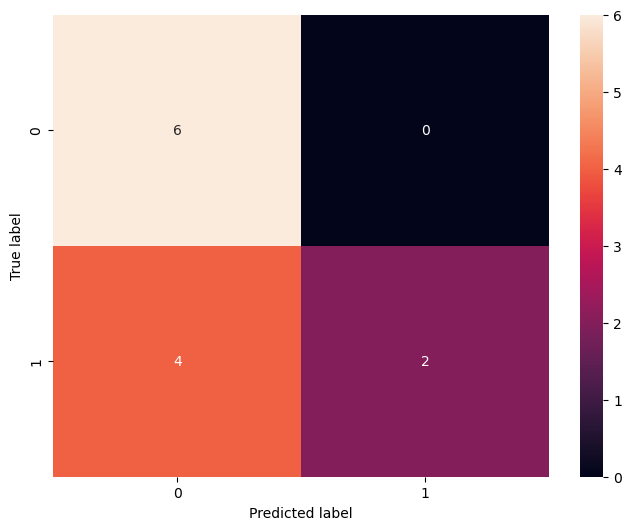

In [84]:

cf = confusion_matrix(y_test, pred_y_ini)
plt.figure(figsize=(8,6))
sns.heatmap(cf, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [125]:
def print_wrongly_classified(y_test,y_pred):
    val = (y_test != y_pred)
    for i,index in enumerate(list(val[val].index)):
        print(f"{i+1}. {X_test[index]}")

In [126]:
print_wrongly_classified(y_test,pred_y_ini)

1. dear sister na me be prince ade from saudi i go transfer 9m to you abeg keep 20 for yourself
2. abeg i be widow for libya i need your account to transfer my late husband 6m you go get 25
3. oga you don win family inheritance na 5m dey for your name abeg send account number to transfer
4. urgent un don approve your remote job pay 50 for id card and start work tomorrow


### Model Training Normalization 

In [32]:
from sklearn.base import TransformerMixin,BaseEstimator
def normalize_pidgin(text):
    slang_to_std = {"una": "you_all", "abeg": "please","chop":"eat"}
    for slang, std in slang_to_std.items():
        text = re.sub(rf"\b{slang}\b", std, text, flags=re.IGNORECASE)
    return text

In [14]:
model2 = make_pipeline(
    TfidfVectorizer(preprocessor=normalize_pidgin),
    RandomForestClassifier()
)

In [15]:
model2.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(preprocessor=<function normalize_pidgin at 0x0000026C2E4C5F70>)),
                ('randomforestclassifier', RandomForestClassifier())])

In [31]:
model2.predict([clean_pidgin("CONGRATULATIONS!You’ve been selected for a Work-From-Home Data Entry position at GlobalTech Inc. Salary: $5,000/month.")])

array([0], dtype=int64)

In [17]:
vectorizer = TfidfVectorizer(preprocessor=normalize_pidgin)

In [33]:
X = vectorizer.fit_transform(["Abeg na where you dey? We dey wait you for Shoprite since 4pm. If you no come soon, we go chop your share of the pizza!"])

In [34]:
print(vectorizer.get_feature_names_out()) 

['4pm' 'If' 'Shoprite' 'We' 'chop' 'come' 'dey' 'for' 'go' 'na' 'no' 'of'
 'pizza' 'please' 'share' 'since' 'soon' 'the' 'wait' 'we' 'where' 'you'
 'your']


## Preprocessing 

In [13]:
import re
def normalize_text(text):
    ## Fix common typos
    text = re.sub(r"\b(?:tran[s|z]f?er|tf|trf)\b", "transfer", text, flags=re.IGNORECASE)
    text = re.sub(r"\b(?:mon[i|e])\b", "money", text, flags=re.IGNORECASE)
    text = re.sub(r"\b(?:plent[i|y])\b", "plenty", text, flags=re.IGNORECASE)
    text = re.sub(r"\b(?:notin)\b", "nothing", text, flags=re.IGNORECASE)
    text = re.sub(r"\b(?:acount|acnt|aza)\b", "account", text, flags=re.IGNORECASE)
    #standardize currency symbols
    text = re.sub(r"\$|USD|us\sdollars", "usd ", text)
    text = re.sub(r"₦|NGN|naira", "ngn ", text)
    # Remove excessive punctuation (keep ? and ! for urgency cues)
    text = re.sub(r"[^\w\s|!|?]","",text)
    return text.lower()

In [14]:
normalize_text("transfer, plenti, moni aza $200,")

'transfer plenty money account usd 200'

In [15]:
common_pidgin_slang = {
        "una": "you_all",  # Preserve as one token
        "abeg": "please",
        "chop": "eat" ,
        "wan":"want_to",
        "kampe":"fine",
        "H":"hungry",
        "dis":"this",
        "abi?":"right?",
        "di":"the",
        "gree":"agree",
        "Gbam!":"exactly",
        "wetin":"what",
        "wahalar":"trouble",
        "wahala":"trouble",
        "vex":"angry",
        "be":"am",
        "pikin":"child",
        "broda":"brother",
        "naija":"nigeria",
        "yankee":"abroad",
        "ya":"your"
    }
def preserve_pidgin(text):
    for slang,std in common_pidgin_slang.items():
        pattern = rf"\b{slang}\b"
        text = re.sub(pattern,std,text, flags=re.IGNORECASE)
    return text

In [119]:
preserve_pidgin(normalize_text("Dear brother, God reveal say you go donate ₦10,000 to get miracle ₦50M. Reply 'AMEN' now!"))

'dear brother god reveal say you go donate ngn 10000 to get miracle ngn 50m reply amen now!'

In [16]:
def remove_contact_info(text):
    text = re.sub(r"\b(?:\+?\d{10,13}|[\w\.-]+@[\w\.-]+|\w+\.(?:com|ng|org))\b", "[CONTACT]", text)
    return text

In [17]:
### GET Stop Words
from nltk.corpus import stopwords
def get_stopwords(lang):
    if lang == "en":
        return stopwords.words('english') + ["dear","ma","sir","madam","uncle"]
    else:
        return ["na","dey"]

In [18]:
### Lemmatize 
from nltk.stem import WordNetLemmatizer
 
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = " ".join([lemmatizer.lemmatize(text,pos="a") for text in text.split(" ")])
    return words

In [173]:
lemmatize("programs, programmer")

'programs, programmer'

In [19]:
## Highlight common words assciated with scam
def highlight_scam_terms(text):
    SCAM_KEYWORDS = ["maga","inheritance", "lottery", "urgent", "percentage", "bonus"]
    for term in SCAM_KEYWORDS:
        text = re.sub(rf"\b{term}\b", f"SCAM_{term}", text, flags=re.IGNORECASE)
    return text
        

## Splitting Dataset

In [28]:

from sklearn.model_selection import train_test_split
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Model Training

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

preprocessor = Pipeline([
    ("normalize", FunctionTransformer(normalize_text)),
    ("pidgin",FunctionTransformer(preserve_pidgin)),
    ("remove_contacts", FunctionTransformer(remove_contact_info)),
    ("hightlight_scam", FunctionTransformer(highlight_scam_terms)),
    ("lemmatize",FunctionTransformer(lemmatize))
])

vectorize = TfidfVectorizer(
    preprocessor=preprocessor.transform,
    stop_words=get_stopwords("pidgin") + get_stopwords("en")
)

In [30]:
model_stand = make_pipeline(
    vectorize,
    RandomForestClassifier()
)

In [31]:
model_stand.fit(X_train,y_train)

C:\Users\emryz\anaconda3\envs\torch\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'hes', 'id', 'ill', 'im', 'isnt', 'itd', 'itll', 'ive', 'mightnt', 'mustnt', 'neednt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'shouldve', 'thatll', 'theyd', 'theyll', 'theyre', 'theyve', 'wasnt', 'wed', 'well', 'werent', 'weve', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(preprocessor=<bound method Pipeline.transform of Pipeline(steps=[('normalize',
                 FunctionTransformer(func=<function normalize_text at 0x000001B92B77EAF0>)),
                ('pidgin',
                 FunctionTransformer(func=<function preserve_pidgin at 0x000001B92FB564C0>)),
                ('remove_contacts',
                 FunctionTransformer(func=<function remove_contact_in...
                ('lemmatize',
                 FunctionTransformer(func=<function lemmatize at 0x000001B92FB7F160>))])>,
                                 stop_words=['na', 'dey', 'a', 'about', 'above',
                                             'after', 'again', 'against', 'ain',
                                             'all', 'am', 'an', 'and', 'any',
                                             'are', 'aren', "aren't", 'as',
                                             'at', 'be', 'because', 'been',
                                             'before', 'being', 'below',
                                             'between', 'both', 'but', 'by',
                                             'can', ...])),
                ('randomforestclassifier', RandomForestClassifier())])

## Metrics Calculation

In [32]:
## Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred_y= model_stand.predict(X_test)

accuracy_val = accuracy_score(pred_y,y_test)
precision_val = precision_score(pred_y,y_test)
recall_val = recall_score(pred_y,y_test)
f1_val = f1_score(pred_y,y_test)

print(f"Accuracy_score = {accuracy_val}")
print(f"Precision_score = {precision_val}")
print(f"Recall_score = {recall_val}")
print(f"f1_score = {f1_val}")

Accuracy_score = 0.9166666666666666
Precision_score = 0.8333333333333334
Recall_score = 1.0
f1_score = 0.9090909090909091


### Improving on the model using GridSearchcv to find the best parameter

In [33]:
from sklearn.model_selection import GridSearchCV
clf = model_stand = make_pipeline(
    vectorize,
    GridSearchCV(RandomForestClassifier(),
                                 param_grid={'n_estimators': [50, 100,200],"max_depth":[5,10,15]},
                                 cv=5,
                                 refit=True)
)
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(preprocessor=<bound method Pipeline.transform of Pipeline(steps=[('normalize',
                 FunctionTransformer(func=<function normalize_text at 0x000001B92B77EAF0>)),
                ('pidgin',
                 FunctionTransformer(func=<function preserve_pidgin at 0x000001B92FB564C0>)),
                ('remove_contacts',
                 FunctionTransformer(func=<function remove_contact_in...
                                 stop_words=['na', 'dey', 'a', 'about', 'above',
                                             'after', 'again', 'against', 'ain',
                                             'all', 'am', 'an', 'and', 'any',
                                             'are', 'aren', "aren't", 'as',
                                             'at', 'be', 'because', 'been',
                                             'before', 'being', 'below',
                                             'between', 'both', 'but', 'by',
                                             'can', ...])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [5, 10, 15],
                                          'n_estimators': [50, 100, 200]}))])

In [34]:
pred_y= clf.predict(X_test)

accuracy_val = accuracy_score(pred_y,y_test)
precision_val = precision_score(pred_y,y_test)
recall_val = recall_score(pred_y,y_test)
f1_val = f1_score(pred_y,y_test)

print(f"Accuracy_score = {accuracy_val}")
print(f"Precision_score = {precision_val}")
print(f"Recall_score = {recall_val}")
print(f"f1_score = {f1_val}")

Accuracy_score = 0.9166666666666666
Precision_score = 0.8333333333333334
Recall_score = 1.0
f1_score = 0.9090909090909091


In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_y)

Text(0.5, 36.72222222222221, 'Predicted label')

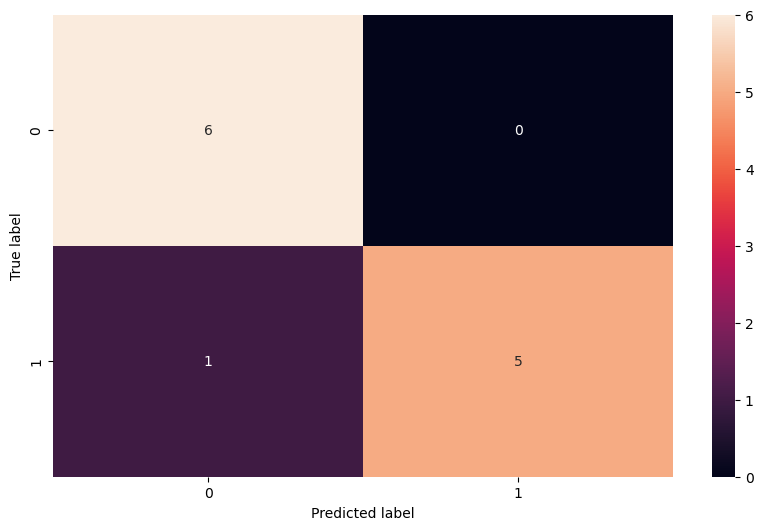

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [127]:
def print_wrongly_classified(y_test,y_pred):
    val = (y_test != y_pred)
    for i,index in enumerate(list(val[val].index)):
        print(f"{i+1}. {X_test[index]}")

In [128]:
print_wrongly_classified(y_test,pred_y)

1. dear sister na me be prince ade from saudi i go transfer 9m to you abeg keep 20 for yourself


## Inference

In [260]:
clf.predict(["CONGRATULATIONS! You don win ₦50M for our Naija lottery! Click dis link [fraud.com] to claim your prize before 24hrs. No dey dull yourself!"])

array([1], dtype=int64)

In [ ]:
model.predict(["How you dey na?"])

## Export Model

In [2]:
import pickle
# with open("scam_model.plk","wb") as f:
#     pickle.dump(clf,f)

In [21]:
with open("scam_model.plk","rb") as f:
    new_model = pickle.load(f)

In [26]:
ans = new_model.predict(["CONGRATULATIONS! You don win ₦50M for our Naija lottery! Click dis link [fraud.com] to claim your prize before 24hrs. No dey dull yourself!"])